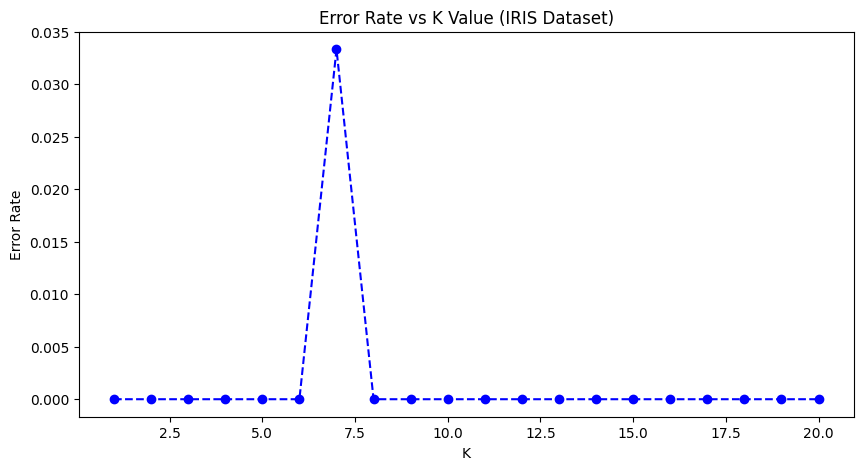

Best K for IRIS dataset: 1

IRIS Dataset - Evaluation:
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



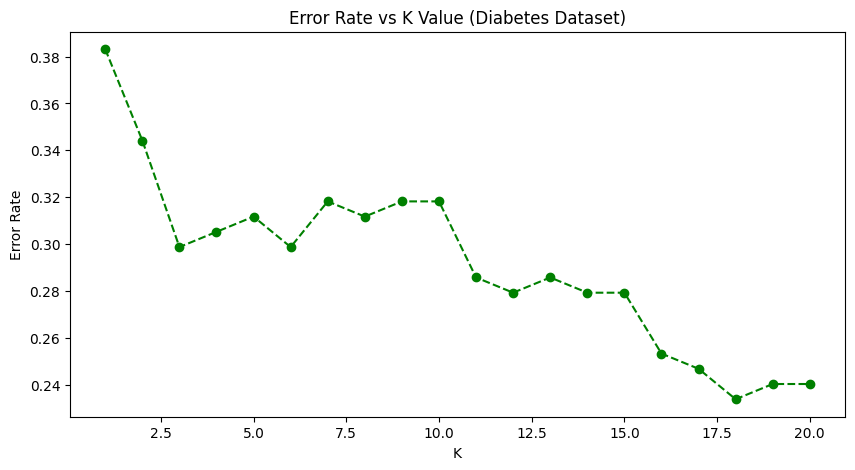

Best K for Diabetes dataset: 18

Diabetes Dataset - Evaluation:
Accuracy Score: 0.7662337662337663
Confusion Matrix:
 [[89 10]
 [26 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv('/content/iris (1).csv')
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    pred_k = knn.predict(X_test_iris)
    error_rates.append(np.mean(pred_k != y_test_iris))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs K Value (IRIS Dataset)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

best_k_iris = error_rates.index(min(error_rates)) + 1
print(f"Best K for IRIS dataset: {best_k_iris}")

knn_iris = KNeighborsClassifier(n_neighbors=best_k_iris)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

print("\nIRIS Dataset - Evaluation:")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

diabetes = pd.read_csv('/content/diabetes.csv')
X_diabetes = diabetes.iloc[:, :-1]
y_diabetes = diabetes.iloc[:, -1]
scaler = StandardScaler()
X_scaled_diabetes = scaler.fit_transform(X_diabetes)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_scaled_diabetes, y_diabetes, test_size=0.2, random_state=42)

error_rates_dia = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_dia, y_train_dia)
    pred_k_dia = knn.predict(X_test_dia)
    error_rates_dia.append(np.mean(pred_k_dia != y_test_dia))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates_dia, marker='o', linestyle='--', color='green')
plt.title('Error Rate vs K Value (Diabetes Dataset)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

best_k_dia = error_rates_dia.index(min(error_rates_dia)) + 1
print(f"Best K for Diabetes dataset: {best_k_dia}")

knn_dia = KNeighborsClassifier(n_neighbors=best_k_dia)
knn_dia.fit(X_train_dia, y_train_dia)
y_pred_dia = knn_dia.predict(X_test_dia)

print("\nDiabetes Dataset - Evaluation:")
print("Accuracy Score:", accuracy_score(y_test_dia, y_pred_dia))
print("Confusion Matrix:\n", confusion_matrix(y_test_dia, y_pred_dia))
print("Classification Report:\n", classification_report(y_test_dia, y_pred_dia))


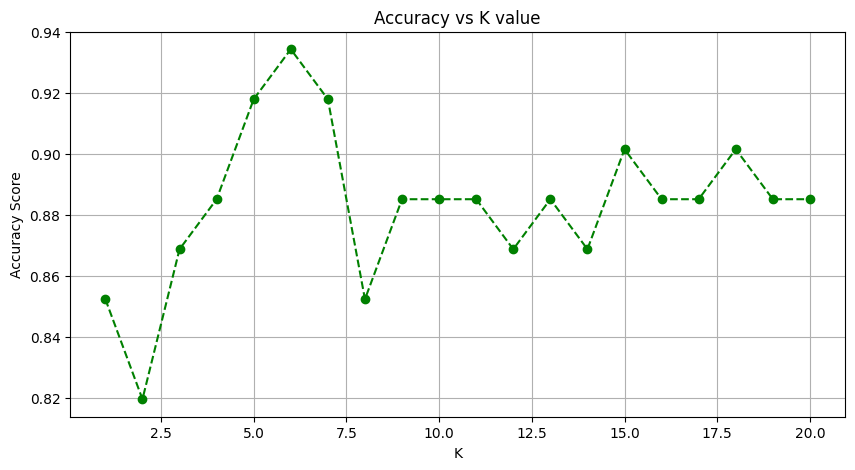

Best K value: 6
Accuracy Score: 0.9344262295081968


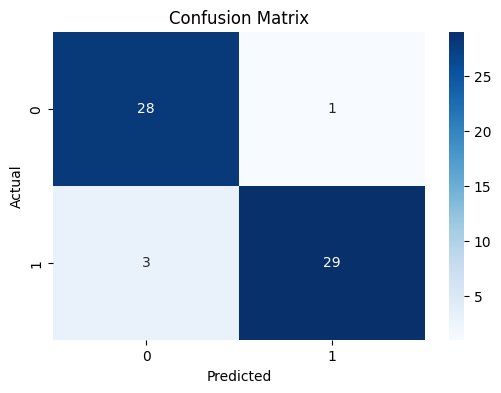

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('/content/heart.csv')

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k
error_rates = []
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='--', color='green')
plt.title("Accuracy vs K value")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

# Best k
best_k = np.argmax(accuracy_scores) + 1
print(f"Best K value: {best_k}")

# Final model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
